# Librerias

In [41]:
import numpy as np
from keras import layers, models, regularizers
from keras.datasets import reuters

# Preparacion de datos

In [42]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [43]:
word_index = reuters.get_word_index()

word_index = dict([(value,key) for (key,value) in word_index.items()])

for _ in train_data[0]:
    print(word_index.get(_ -3))

None
None
None
said
as
a
result
of
its
december
acquisition
of
space
co
it
expects
earnings
per
share
in
1987
of
1
15
to
1
30
dlrs
per
share
up
from
70
cts
in
1986
the
company
said
pretax
net
should
rise
to
nine
to
10
mln
dlrs
from
six
mln
dlrs
in
1986
and
rental
operation
revenues
to
19
to
22
mln
dlrs
from
12
5
mln
dlrs
it
said
cash
flow
per
share
this
year
should
be
2
50
to
three
dlrs
reuter
3


In [44]:
train_data.shape

(8982,)

In [45]:
def vectorizar(sequences, dim = 10000):
    results = np.zeros((len(sequences), dim))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [46]:
X_train = vectorizar(train_data)
X_test = vectorizar(test_data)

In [47]:
from keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [48]:
x_val = X_train[:1000]
partial_x_train = X_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

# Red neuronal

In [57]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(8, activation='relu', kernel_regularizer=regularizers.l1(0.01)))
model.add(layers.Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dense(46, activation='softmax'))

In [58]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [59]:
history = model.fit(partial_x_train, partial_y_train, epochs=50, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 270ms/step - accuracy: 0.0167 - loss: 4.5256 - val_accuracy: 0.0190 - val_loss: 4.1924
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0848 - loss: 4.0695 - val_accuracy: 0.3660 - val_loss: 3.7002
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3758 - loss: 3.5424 - val_accuracy: 0.3930 - val_loss: 3.1806
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4038 - loss: 3.0304 - val_accuracy: 0.3960 - val_loss: 2.7977
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4113 - loss: 2.6800 - val_accuracy: 0.4080 - val_loss: 2.5311
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4384 - loss: 2.4289 - val_accuracy: 0.5400 - val_loss: 2.3077
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6142 - loss: 2.1998 - val_accuracy: 0.6170 - val_loss: 2.1297
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6460 - loss: 2.0203 - val_accuracy: 0.6410 - val_los

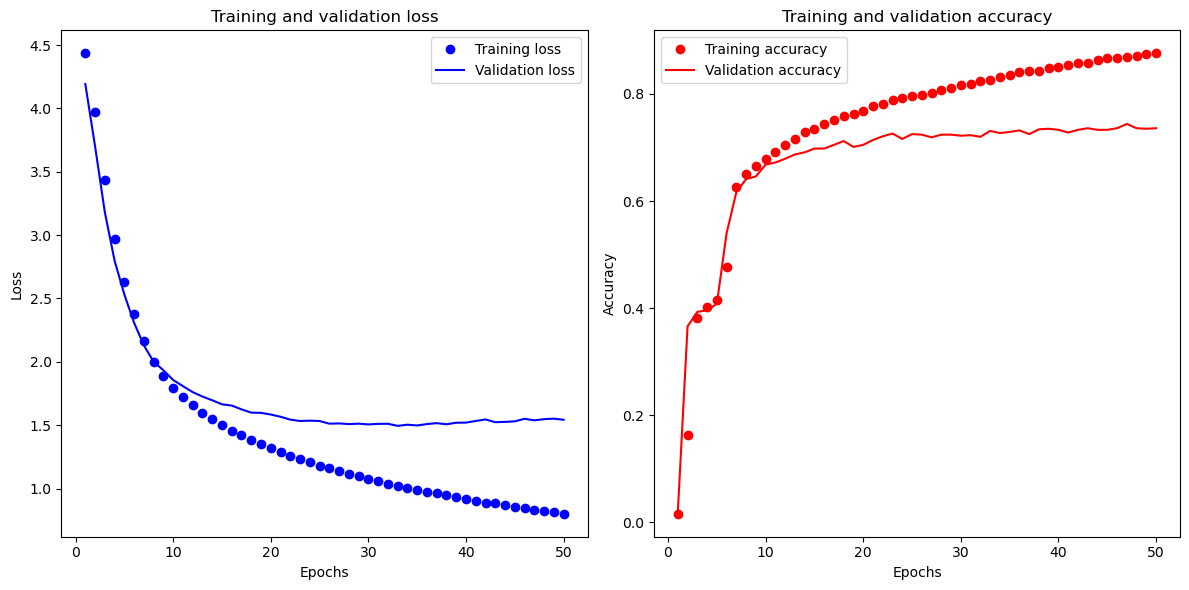

In [60]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']

fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # Ajusta el tamaño de la figura si es necesario
epochs = range(1, len(loss_values) + 1)

# Gráfica de pérdida en el primer subgráfico
ax[0].plot(epochs, loss_values, 'bo', label='Training loss')
ax[0].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[0].set_title('Training and validation loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()

# Gráfica de precisión en el segundo subgráfico
ax[1].plot(epochs, accuracy_values, 'ro', label='Training accuracy')
ax[1].plot(epochs, val_accuracy_values, 'r', label='Validation accuracy')
ax[1].set_title('Training and validation accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

plt.tight_layout()  # Ajusta automáticamente los parámetros de la subtrama para dar un padding especificado
plt.show()

In [61]:
model.evaluate(X_test, y_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7163 - loss: 1.6609


[1.703371286392212, 0.7083704471588135]

# Prediccion

In [62]:
np.argmax(model.predict(X_test)[0])

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


3